## Regresión Lineal Simple - Campañas de Marketing

## Paso 1: Librerías Importantes

In [54]:
##Warnings
import warnings
warnings.filterwarnings('ignore')

##test de normalidad
from scipy import stats

##Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Normalización
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

##Función para el modelo 
import statsmodels.api as sm

## Paso 2: Librerías para el Proceso de Regresión

In [40]:
# Función para importar data .xlsx o .csv
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')
        
def diagCaja(df, coluno, coldos, coltres):
    fig, ax = plt.subplots(3, figsize=(5,5))
    plt1 = sns.boxplot(df[coluno], ax=ax[0])
    plt2 = sns.boxplot(df[coldos], ax=ax[1])
    plt3 = sns.boxplot(df[coltres], ax=ax[2])
    plt.tight_layout()

##Función para cruce de variables
def grafT(df, vect, vary):
    sns.pairplot(df, x_vars=vect, y_vars=vary, height=4, aspect=1, kind='reg')

# Función para el test de Shapiro - wilk - resistente al ruido en los datos

def testShapiroWilk(df):
    valoresP = []
    concepto = []
    variable = []
    for column in df:
        k2, p_value = stats.shapiro(df[column].values)
        valoresP.append(p_value)
        variable.append(column)
        if (p_value < 0.05):
            concepto.append('No es una variable Normal')
        else:
            concepto.append('Es una variable Normal')
    dfShapiro = pd.DataFrame(
        {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
    return dfShapiro

# Función para normalizar la data min - max sklearn


def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

## Función para hacer la matriz de correlación de manera Tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

  

### **Pregunta de Investigación: ¿Si es viable invertir en alguna específica para incrementar las ventas?**

## Paso 3: Ejecucción Funciones

In [5]:
## importación
datos = importDatos('C:/Users/Supermercado/Downloads/1. Limpieza/3. Aprendizaje Supervisado Regresion/Datasets/', 'ventas','.csv')

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Paso 4: Graficas exploratorias

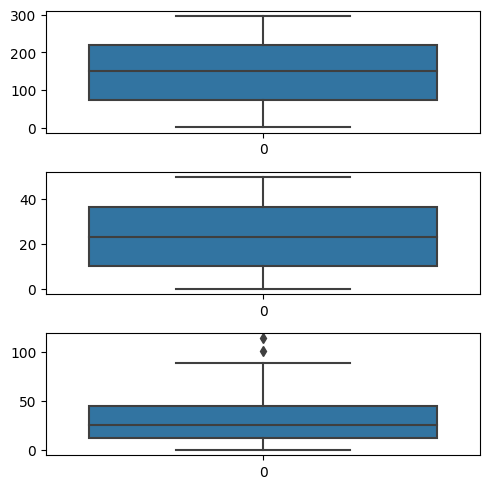

In [27]:
diagCaja(datos, 'TV','Radio','Newspaper')

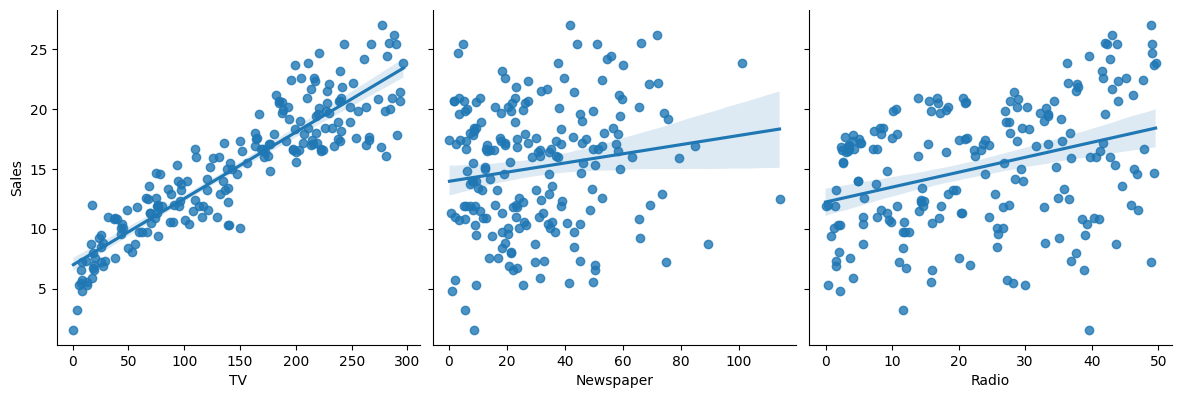

In [33]:
##Llamado a función
grafT(datos, ['TV','Newspaper','Radio'], 'Sales')

In [35]:
##Test de normalidad - se escoge ventas como variable predictora o Y, teniendo en cuenta que su valor de P es mayor a 0.05.
dataShapiro= testShapiroWilk(datos)

dataShapiro

,Variable,Valores P,Concepto
0,TV,1.692741e-06,No es una variable Normal
1,Radio,5.196916e-07,No es una variable Normal
2,Newspaper,1.127221e-07,No es una variable Normal
3,Sales,7.643628e-02,Es una variable Normal


In [36]:
##Se revisa la std(desviación estandar) y la media si estan alejados se procede a normalizar.
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [39]:
###Normalizando la data
dataNorm = normaData(datos)

dataNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,0.494902,0.290342,0.0,0.249155,0.504058,0.737656,1.0
Radio,200.0,0.469032,0.299331,0.0,0.201109,0.461694,0.736391,1.0
Newspaper,200.0,0.266086,0.191545,0.0,0.109499,0.223835,0.394019,1.0
Sales,200.0,0.532697,0.208027,0.0,0.370079,0.566929,0.687008,1.0


In [47]:
##Correlaciones
##Según la correlación de spearman y pearson Tv y Sales tienen un coeficiente de correlación de 0.90;
##por otro lado con la correlación de Kendall la fortaleza del modelo futuro de regresión se encuentra en el rango de 0.72 a 0.90
##El posible modelo puede estar en un margen de error entre 10% al 28%.
corr_matrix = dataNorm.corr(method='spearman')

tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
3,TV,Sales,0.900996,0.900996
12,Sales,TV,0.900996,0.900996
7,Radio,Sales,0.339949,0.339949
13,Sales,Radio,0.339949,0.339949
6,Radio,Newspaper,0.316979,0.316979
9,Newspaper,Radio,0.316979,0.316979
11,Newspaper,Sales,0.123027,0.123027
14,Sales,Newspaper,0.123027,0.123027
1,TV,Radio,0.056123,0.056123
4,Radio,TV,0.056123,0.056123


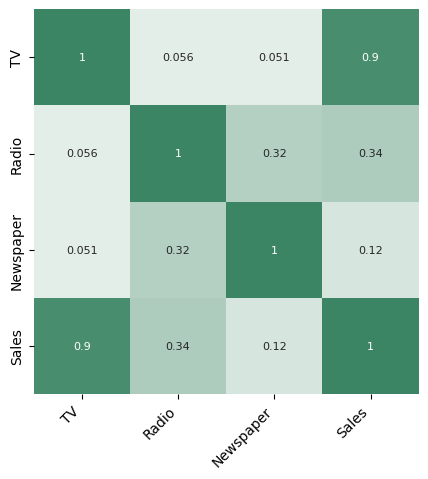

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(15, 150, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Paso Entrenamiento y Testeo del Modelo

In [71]:
##Dividir el dataset
##X variable o variables independiente
X = dataNorm['TV']
##y variable a predecir
y = dataNorm['Sales']

##Partición de la data 70% entrenamiento y 30% testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=100)

#X_train.shape, X_test.shape

##Entrenar el modelo
X_train_sm = sm.add_constant(X_train)

RLMUno = sm.OLS(y_train, X_train_sm).fit()

In [72]:
RLMUno.params

#y = m+ b*X

#Sales = 0.212081 + 0.635007 * X_test

const    0.205487
TV       0.647731
dtype: float64

In [73]:
print(RLMUno.summary())
##81% de los datos de ventas pueden ser predecidos el restante 19% es el margen de error del modelo,
##El modelo es consistente con datos nuevo ya que hay una diferencia minima de 0.002 entre valores de R.
##De 100 datos analizados 81 se pueden predecir correctamente de lo contrario 19 no serán bien predecidos.
##Con datos de entrenamiento de 60% y 80% tiene la misma eficiencia.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     543.6
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           5.43e-46
Time:                        10:08:38   Log-Likelihood:                 109.48
No. Observations:                 120   AIC:                            -215.0
Df Residuals:                     118   BIC:                            -209.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2055      0.016     12.497      0.0

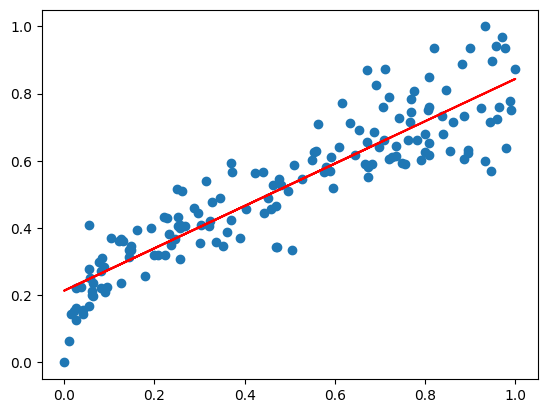

In [64]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.2139 + 0.6299 * X_train, 'r')
plt.show()

In [76]:
y_train_pred = RLMUno.predict(X_train_sm)

prediccion = (y_train - y_train_pred)

prediccion.describe().T

count    1.200000e+02
mean    -9.251859e-18
std      9.757624e-02
min     -2.479606e-01
25%     -6.533273e-02
50%      8.319833e-04
75%      6.641199e-02
max      2.304349e-01
dtype: float64

In [75]:
X_test_sm = sm.add_constant(X_test)

y_pred = RLMUno.predict(X_test_sm)

y_pred.describe().T

count    80.000000
mean      0.524377
std       0.151729
min       0.221039
25%       0.396772
50%       0.548957
75%       0.666970
max       0.748950
dtype: float64

In [79]:
from sklearn.metrics import r2_score, mean_squared_error

rfinal = r2_score(y_test, y_pred)

round(rfinal,2)*100

78.0

In [83]:
rmse = mean_squared_error(y_test, y_pred)
round(rmse,4)*100

0.62

In [84]:
y_test

126    0.196850
104    0.751969
99     0.614173
92     0.700787
111    0.795276
         ...   
146    0.653543
199    0.661417
10     0.433071
20     0.645669
165    0.602362
Name: Sales, Length: 80, dtype: float64

In [85]:
y_pred

126    0.221039
104    0.725731
99     0.500109
92     0.680825
111    0.733397
         ...   
146    0.729892
199    0.712368
10     0.348745
20     0.682359
165    0.717626
Length: 80, dtype: float64

El modelo creado de regresión linea tomó la variable Tv como independiente y Sales como Dependiente. Se particionó la data en entrenamiento con un 60%
de la data y en testeo con un 40% restante. Ejecutando las métricas se evidencia que de 100 datos de ejemplo el 78% puede predecirse de manera correcta
con un margen de error del 22% asumiendo una diferencia ente los valores actuales y predecidos (RMSE) de 0.62. Lo cual manifiesta que es posible invertir en campaña de TV para poder mejorar las ventas de algun producto.